D:\darrin\anaconda\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
D:\darrin\anaconda\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


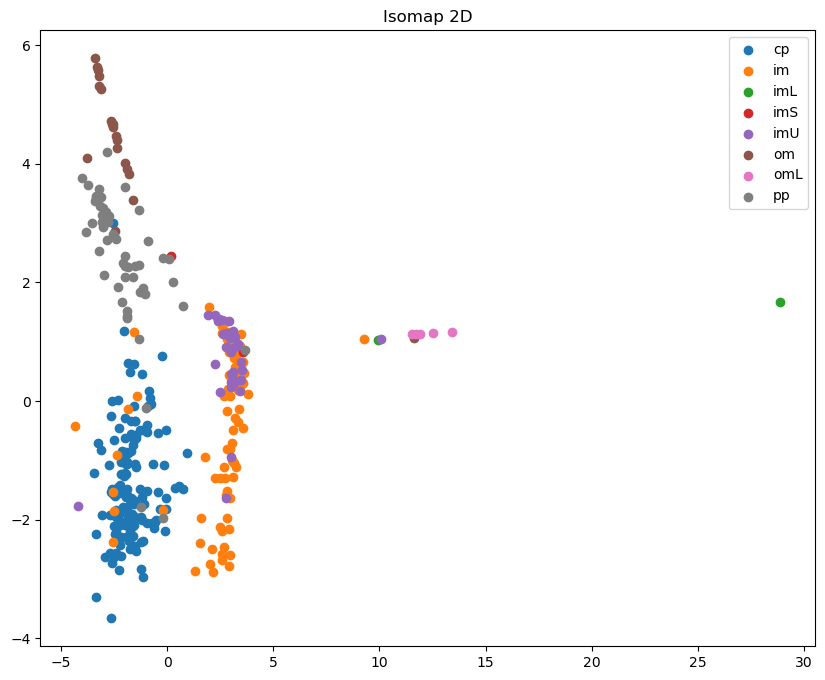

D:\darrin\anaconda\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
D:\darrin\anaconda\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


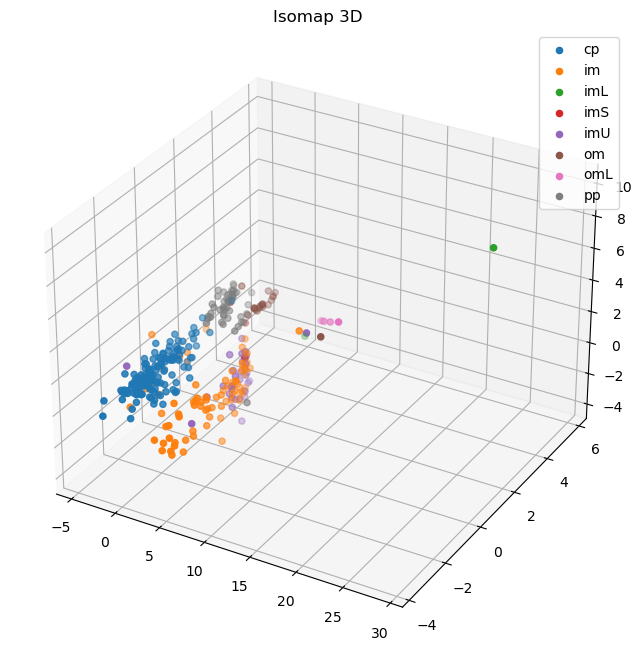

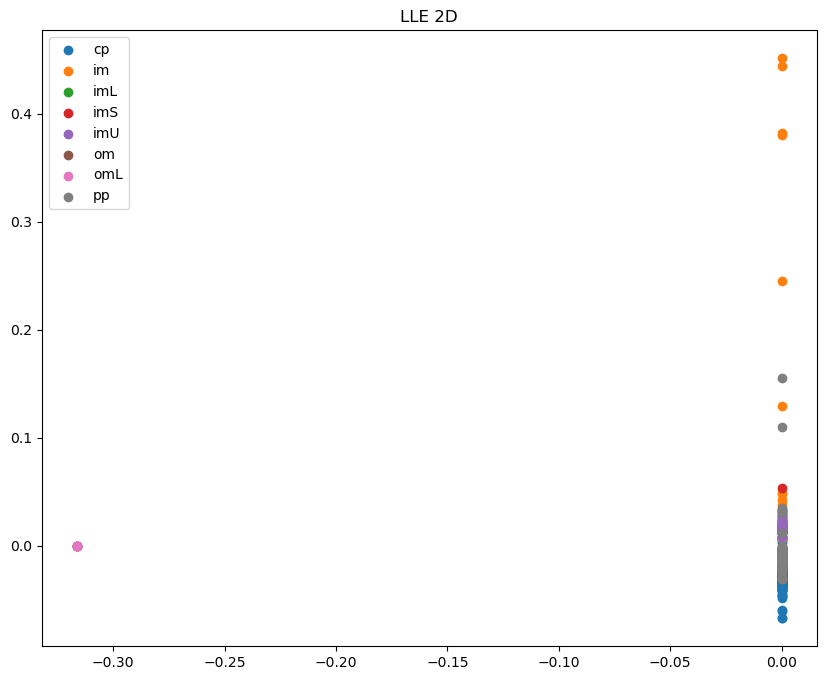

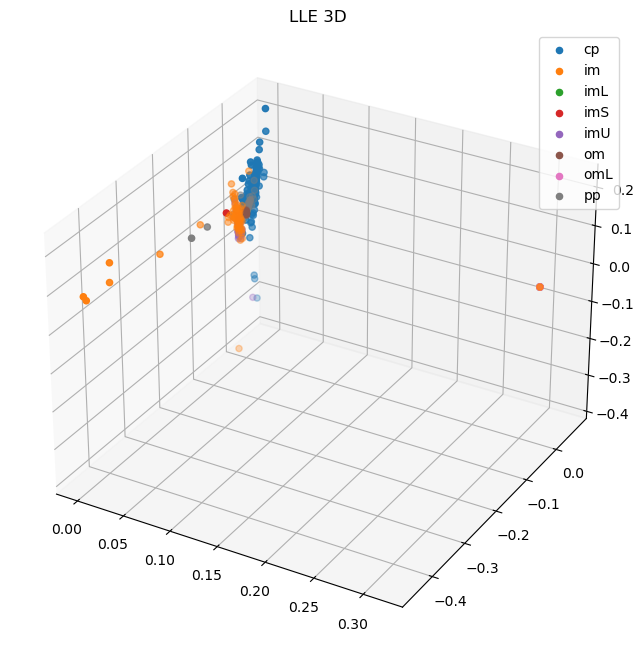

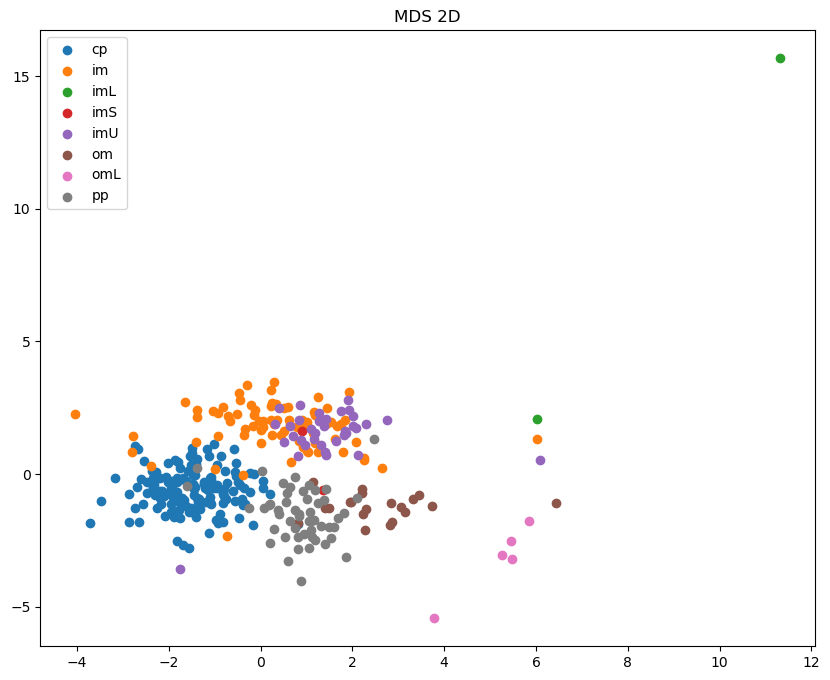

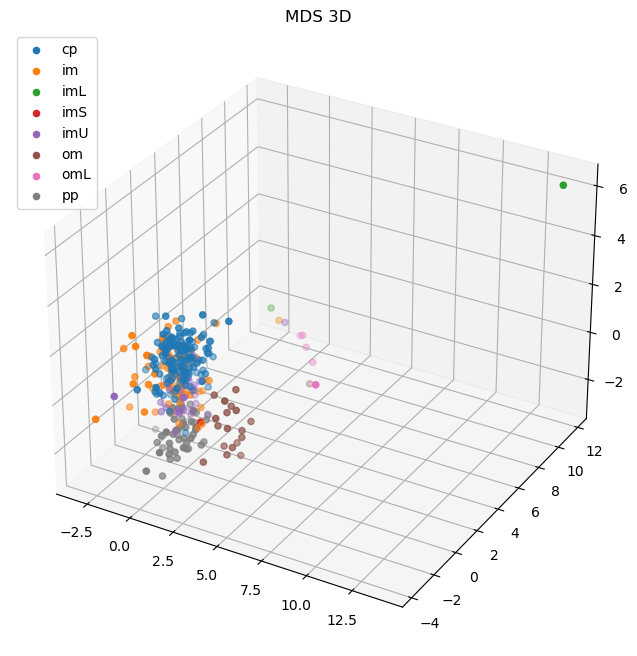

D:\darrin\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\darrin\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


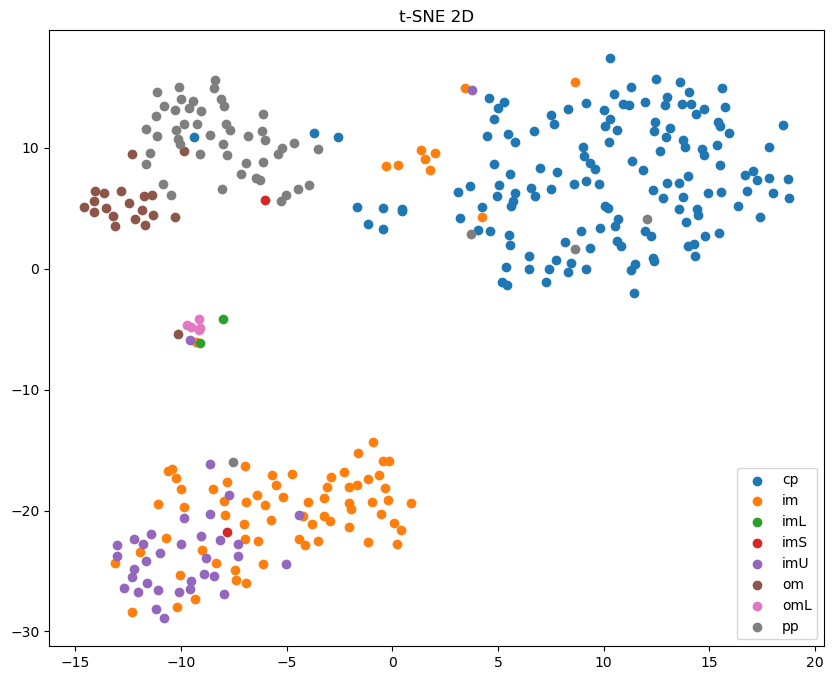

D:\darrin\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\darrin\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


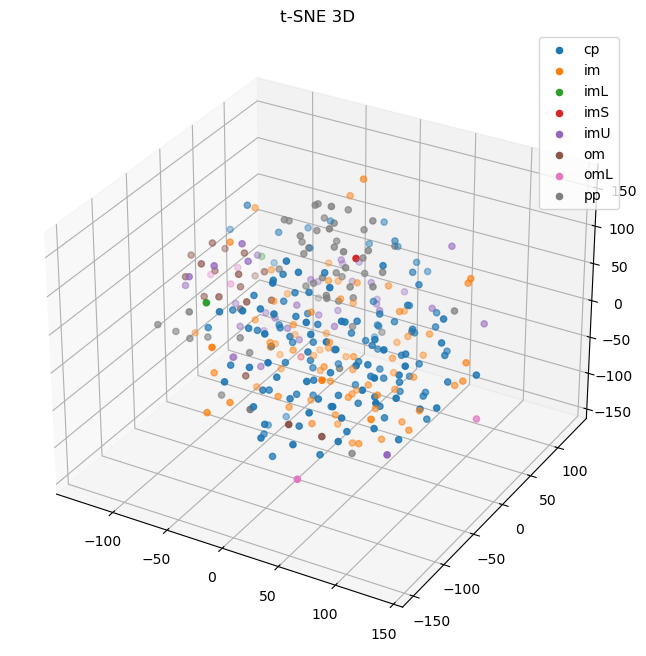

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Завантаження даних
column_names = ['Sequence Name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']
data = pd.read_csv('ecoli.data', sep='\s+', header=None, names=column_names)

# Підготовка даних
X = data.iloc[:, 1:8].values  
y = data['class'].values  

# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Функція для візуалізації результатів
def plot_2d(X, y, title):
    plt.figure(figsize=(10, 8))
    unique_classes = np.unique(y)
    for cls in unique_classes:
        plt.scatter(X[y == cls, 0], X[y == cls, 1], label=cls)
    plt.title(title)
    plt.legend()
    plt.show()

def plot_3d(X, y, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    unique_classes = np.unique(y)
    for cls in unique_classes:
        ax.scatter(X[y == cls, 0], X[y == cls, 1], X[y == cls, 2], label=cls)
    ax.set_title(title)
    ax.legend()
    plt.show()

# Isomap
isomap_2d = Isomap(n_components=2)
X_isomap_2d = isomap_2d.fit_transform(X_scaled)
plot_2d(X_isomap_2d, y, 'Isomap 2D')

isomap_3d = Isomap(n_components=3)
X_isomap_3d = isomap_3d.fit_transform(X_scaled)
plot_3d(X_isomap_3d, y, 'Isomap 3D')

# Locally Linear Embedding
lle_2d = LocallyLinearEmbedding(n_components=2)
X_lle_2d = lle_2d.fit_transform(X_scaled)
plot_2d(X_lle_2d, y, 'LLE 2D')

lle_3d = LocallyLinearEmbedding(n_components=3)
X_lle_3d = lle_3d.fit_transform(X_scaled)
plot_3d(X_lle_3d, y, 'LLE 3D')

# Multi-dimensional Scaling
mds_2d = MDS(n_components=2)
X_mds_2d = mds_2d.fit_transform(X_scaled)
plot_2d(X_mds_2d, y, 'MDS 2D')

mds_3d = MDS(n_components=3)
X_mds_3d = mds_3d.fit_transform(X_scaled)
plot_3d(X_mds_3d, y, 'MDS 3D')

# t-SNE
tsne_2d = TSNE(n_components=2)
X_tsne_2d = tsne_2d.fit_transform(X_scaled)
plot_2d(X_tsne_2d, y, 't-SNE 2D')

tsne_3d = TSNE(n_components=3)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)
plot_3d(X_tsne_3d, y, 't-SNE 3D')

